<a href="https://colab.research.google.com/github/MDTanveerAlam1/ExcelR/blob/main/PCA_Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
import pandas as pd
df = pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [34]:
# Display the first 5 rows
print(df.head())

# Summary statistics
print(df.describe())

# Info about the dataset
print(df.info())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.0

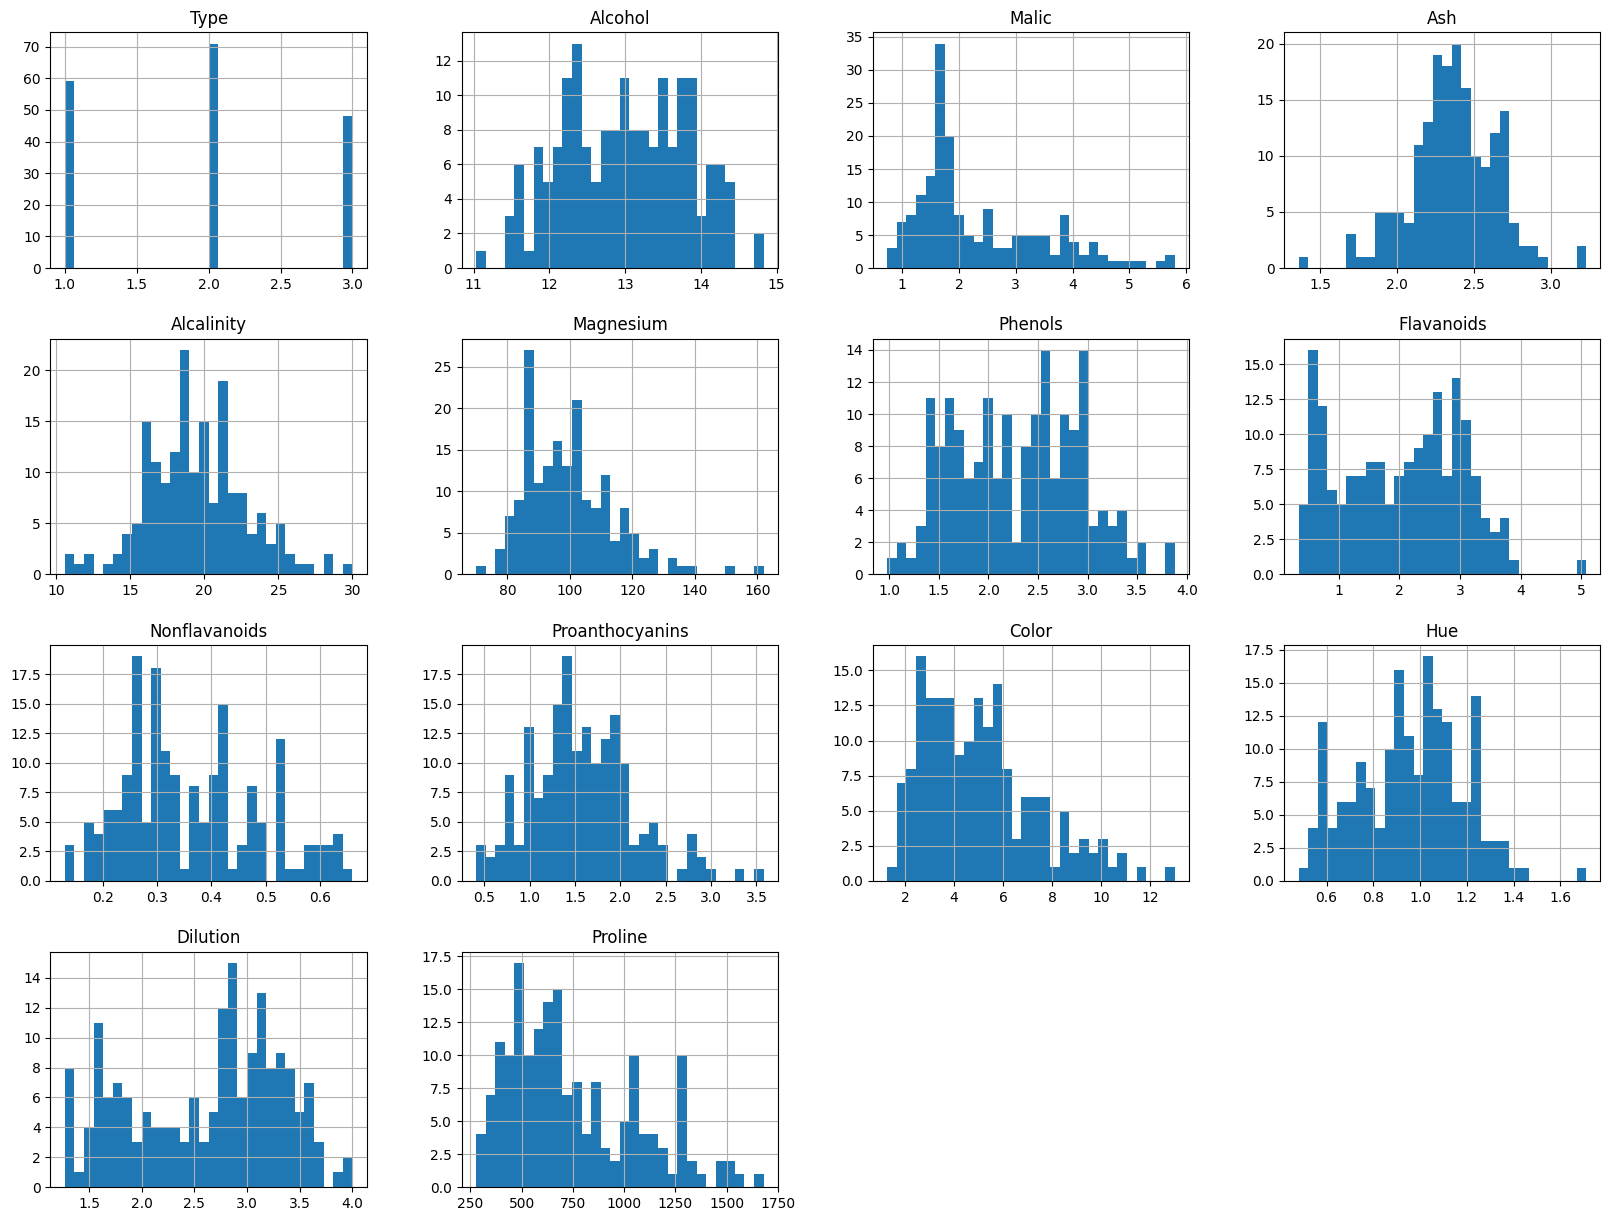

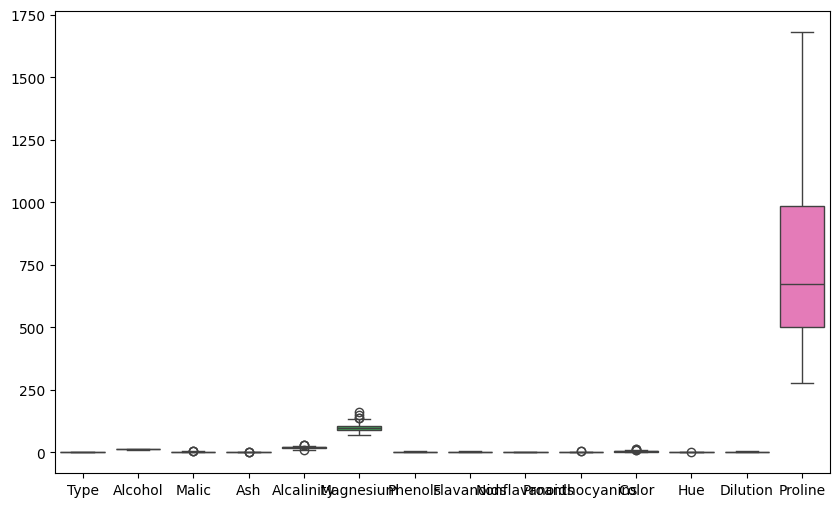

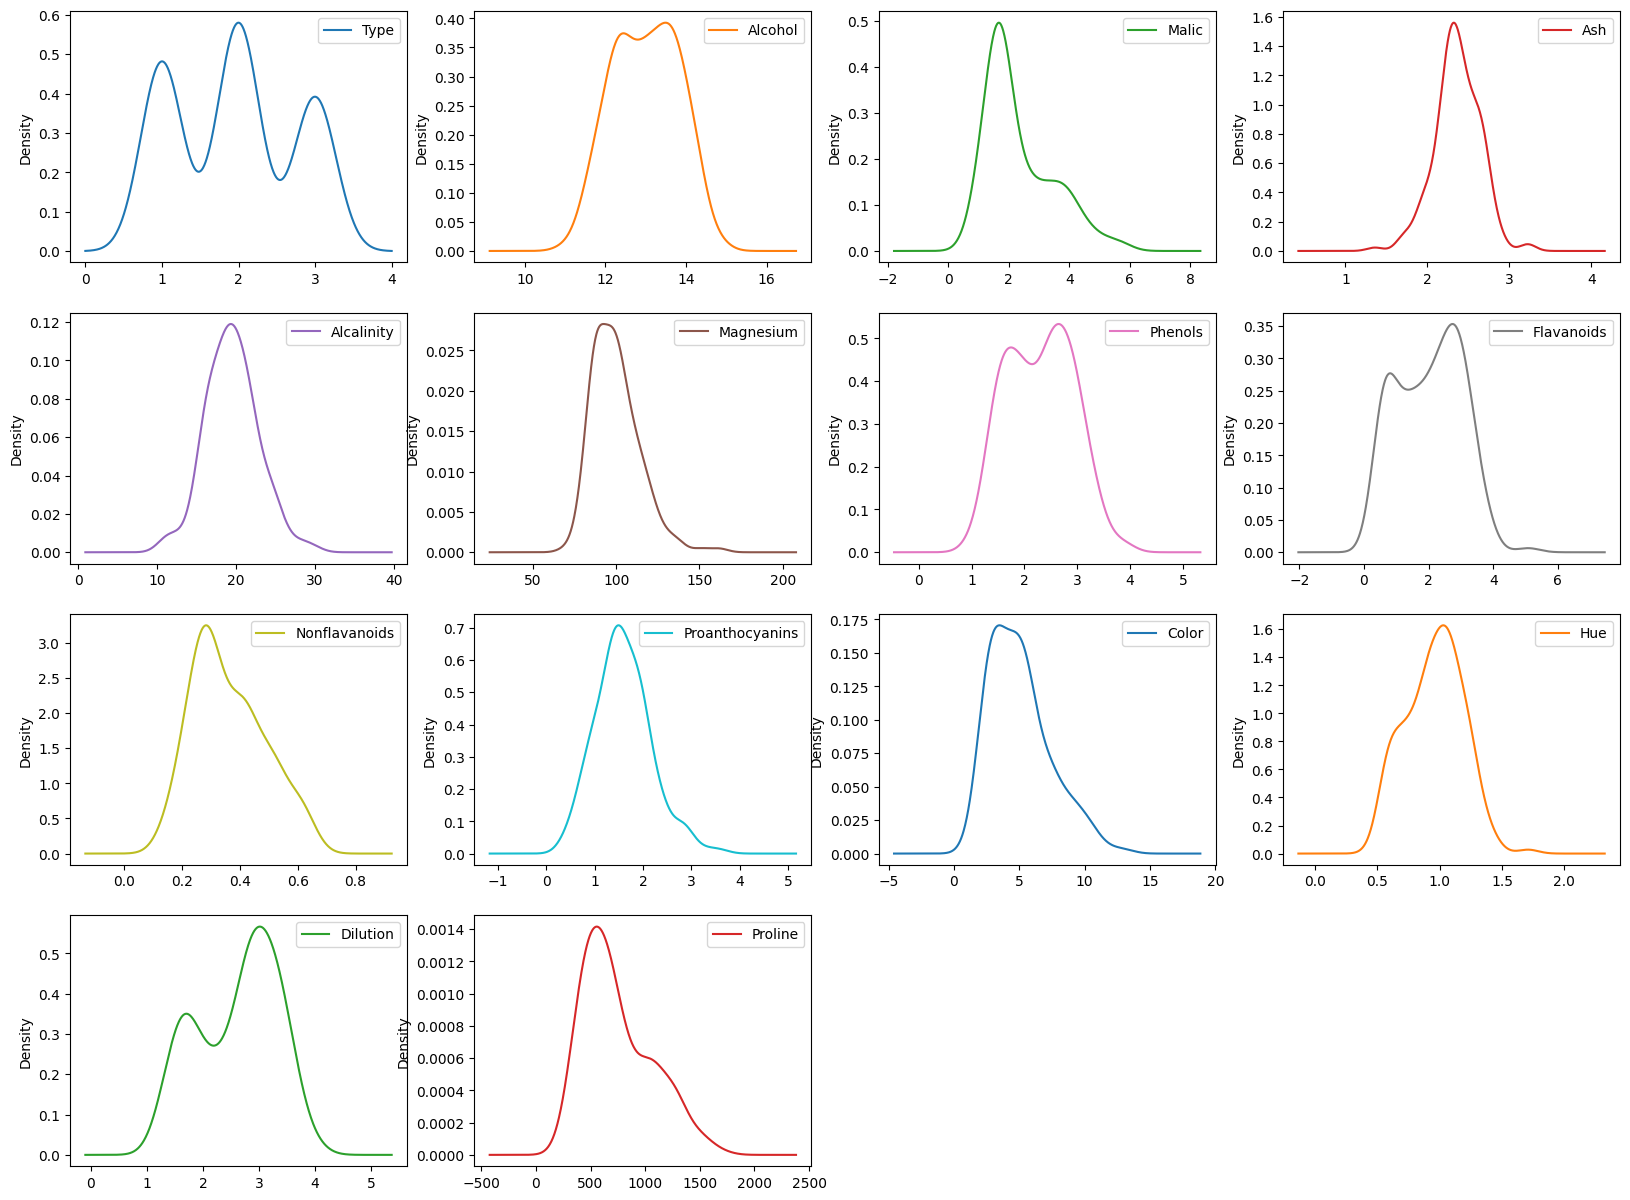

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(bins=30, figsize=(20, 15))
plt.show()

# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

# Density plots
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(20, 15))
plt.show()

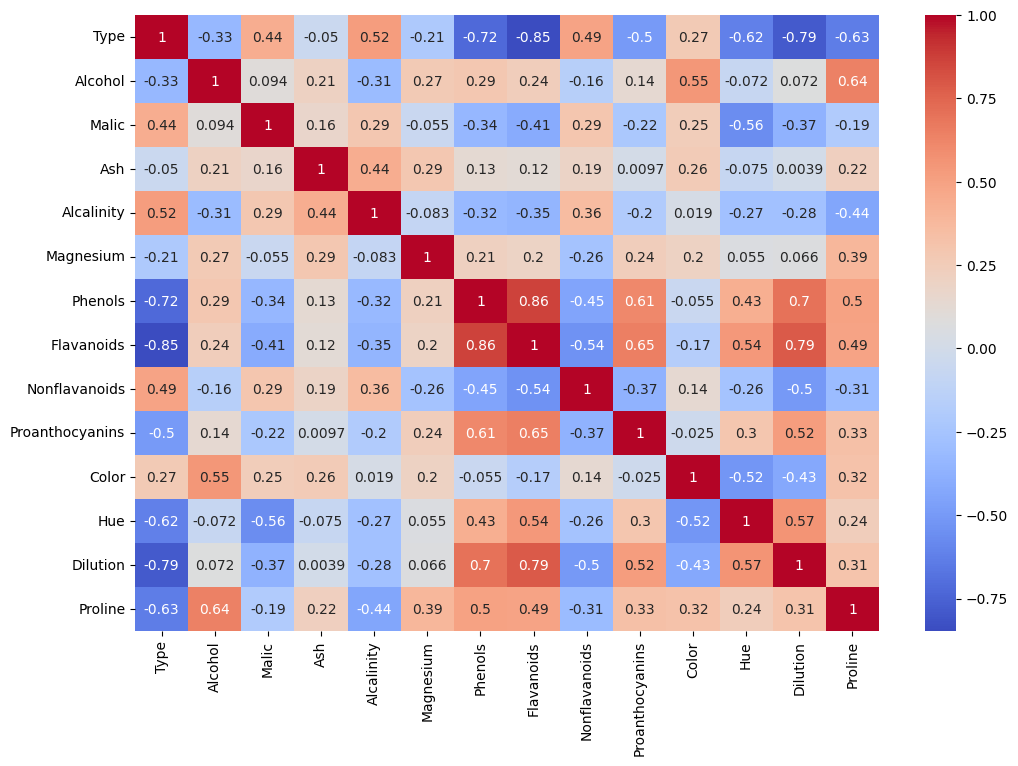

In [36]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Task 2: Dimensionality Reduction with PCA:

## Standardize the Features:

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

##Implement PCA:

In [38]:
from sklearn.decomposition import PCA

pca = PCA()
pca_data = pca.fit_transform(scaled_data)
pca_data

array([[-3.52293390e+00,  1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00, -3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00,  1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00,  2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00,  2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00,  2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

##Determine Optimal Number of Principal Components:

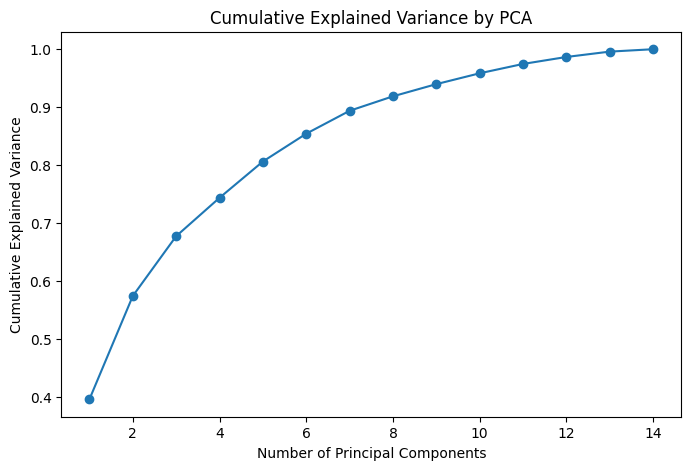

In [39]:
# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

##Transform Dataset:

In [40]:
# Choose the number of components (e.g., 2 for visualization purposes)
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_data)
pca_transformed

array([[-3.5229339 ,  1.45309844],
       [-2.52885806, -0.33001925],
       [-2.78502898,  1.03693595],
       [-3.92258841,  2.76821026],
       [-1.40751111,  0.86777309],
       [-3.28812981,  2.13017513],
       [-2.75057754,  1.17916999],
       [-2.39286652,  1.61128232],
       [-2.79525633,  0.92317952],
       [-3.00559666,  0.79628417],
       [-3.67868855,  1.31252342],
       [-2.10963477,  0.61298199],
       [-2.43845636,  0.67852331],
       [-3.67349453,  1.14012136],
       [-4.44157575,  2.11031917],
       [-2.60892387,  1.66641801],
       [-2.47542846,  2.33089672],
       [-2.22623243,  1.63359016],
       [-3.74226929,  2.52840527],
       [-2.3944115 ,  1.06452946],
       [-3.33656895,  0.79601279],
       [-1.48140399,  0.24008547],
       [-2.82806867, -0.08685755],
       [-2.00771405, -0.51561649],
       [-2.11463604, -0.31592057],
       [-1.39753751,  0.93821529],
       [-2.13348803,  0.68710205],
       [-1.62970383, -0.09118403],
       [-2.50760753,

#Task 3: Clustering with Original Data

##Apply Clustering Algorithm:

In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)  # Choose the number of clusters
clusters_original = kmeans.fit_predict(df)

##Visualize Clustering Results:

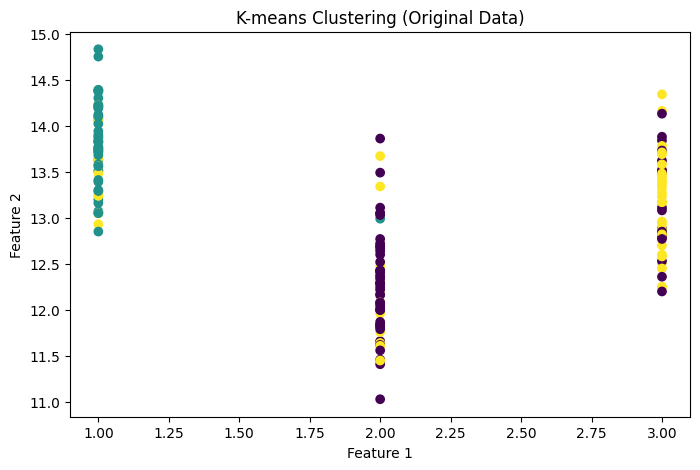

In [42]:
plt.figure(figsize=(8, 5))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters_original, cmap='viridis')
plt.title('K-means Clustering (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

##Evaluate Clustering Performance:

In [43]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_original = silhouette_score(df, clusters_original)
dbi_original = davies_bouldin_score(df, clusters_original)
print(f'Silhouette Score (Original Data): {silhouette_original}')
print(f'Davies-Bouldin Index (Original Data): {dbi_original}')

Silhouette Score (Original Data): 0.5711220218931753
Davies-Bouldin Index (Original Data): 0.5342660703679686


#Task 4: Clustering with PCA Data


##1.Apply Clustering Algorithm:

In [44]:
clusters_pca = kmeans.fit_predict(pca_transformed)

##2.Visualize Clustering Results:

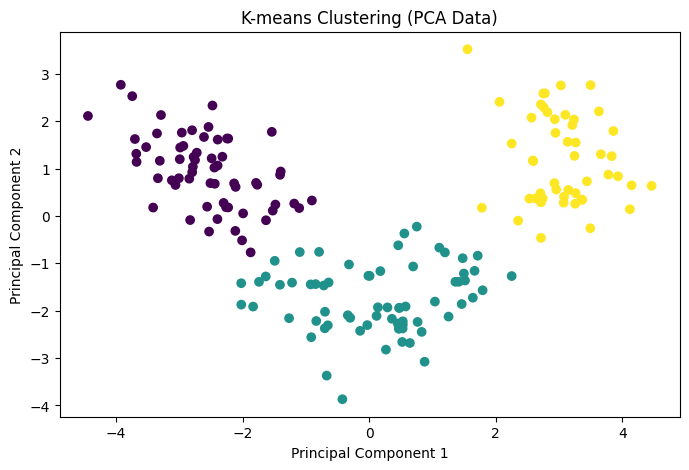

In [45]:
plt.figure(figsize=(8, 5))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=clusters_pca, cmap='viridis')
plt.title('K-means Clustering (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

##3.Evaluate Clustering Performance:

In [46]:
silhouette_pca = silhouette_score(pca_transformed, clusters_pca)
dbi_pca = davies_bouldin_score(pca_transformed, clusters_pca)
print(f'Silhouette Score (PCA Data): {silhouette_pca}')
print(f'Davies-Bouldin Index (PCA Data): {dbi_pca}')

Silhouette Score (PCA Data): 0.6024415520362845
Davies-Bouldin Index (PCA Data): 0.5397078562575713


#Task 5: Comparison and Analysis


##1. Compare the clustering results obtained from the original dataset and PCA-transformed data.

#### ->>The clustering results from the original dataset and the PCA-transformed data show how KMeans groups data points based on all features versus a reduced set of principal components.  The visualizations (scatter plots) directly illustrate these groupings.  The original data clustering uses the first two features for visualization, while the PCA clustering uses the first two principal components, which are linear combinations of all original features.


##2. Discuss any similarities or differences observed in the clustering results.

####->>Similarities might include similar overall cluster shapes if the principal components effectively capture the most important variance in the data.  Differences might appear in the separation of clusters or the precise assignment of points, especially if important information was lost during dimensionality reduction.  Comparing the silhouette scores and Davies-Bouldin indices provides quantitative measures for these similarities or differences.  Higher silhouette scores and lower Davies-Bouldin indices indicate better-defined clusters.

## 3. Reflect on the impact of dimensionality reduction on clustering performance.
####->> Dimensionality reduction via PCA can improve clustering performance by removing noise and redundancy in the data, making the clusters more distinct and easier to identify.  However, if crucial information is lost in the dimensionality reduction process, the clustering on the PCA data may be less accurate than on the original dataset.  The number of principal components selected is critical; too few may discard essential information, while too many may retain noise.

###4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset
####->> Using PCA before clustering offers computational advantages, especially with high-dimensional datasets. PCA reduces the number of features, speeding up the clustering algorithm and potentially decreasing memory usage. However, it introduces a trade-off: the accuracy of the clustering might be affected due to information loss. Clustering on the original data provides higher fidelity but might be computationally expensive and potentially sensitive to noisy or irrelevant features.  The choice depends on the specific dataset, the computational resources available, and the priority given to accuracy vs. efficiency.

# Task 6: Conclusion and Insights

## 1. Summary of Key Findings and Insights:

### The analysis explored the Wine dataset using Principal Component Analysis (PCA) for dimensionality reduction and K-means clustering.  PCA effectively reduced the dataset's dimensionality, capturing a significant portion of the variance in just two principal components. Clustering was performed on both the original dataset and the PCA-transformed data.  Evaluation metrics like the silhouette score and Davies-Bouldin index were used to compare the clustering performance in both scenarios.  The visualization of clusters using scatterplots provided an additional qualitative insight into the groupings.

## 2. Practical Implications of PCA and Clustering:

## **PCA:**
###  **Dimensionality reduction:** Reduces computational burden, improves visualization, and removes redundant or less-important information.
###  **Feature extraction:** Creates new features (principal components) that capture the maximum variance in the data, which can improve model performance.
###  **Noise reduction:** Can eliminate noisy features or random variation, leading to clearer patterns.

## **Clustering:**
###  **Customer segmentation:** Grouping customers based on shared characteristics.
###  **Anomaly detection:** Identifying outliers that do not fit within established clusters.
###  **Image segmentation:** Dividing images into regions with similar properties.
###  **Document classification:** Grouping documents with similar topics.

## 3. Recommendations for Use:

##  **PCA:**
###1. Use when dealing with high-dimensional data where dimensionality reduction is needed for visualization or computational efficiency.
###2. Use when you suspect that there are redundant features or noise present in your data.
###3. Consider the trade-off between dimensionality reduction and information loss. Examine the explained variance ratio to choose the appropriate number of principal components.
###4. Not suitable for all scenarios. If the relationships between variables are highly non-linear, PCA might not be effective.

##  **Clustering:**
###1. Useful when exploring underlying group structures in your data.
###2. When you need to segment your data into meaningful groups for analysis or modeling.
###3. The choice of clustering algorithm (e.g., K-means, hierarchical clustering) depends on the data distribution and desired outcome.
###4. Carefully evaluate the clustering performance metrics (e.g., silhouette score, Davies-Bouldin index) to choose the optimal number of clusters and assess the quality of the results.

## **Based on this analysis:**

## The PCA transformation seems to have provided a reasonable summary of the original data for the purposes of visualization and clustering. The quantitative comparison of clustering performance metrics should help to decide if the reduced dimensionality is worth the potential loss of information.  Direct clustering is an alternative approach that fully utilizes all the data but might be computationally expensive and visually difficult to interpret for datasets with high dimensionality.